**1. Univariate Selection**
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the **SelectKBest class** that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the c**hi-squared (chi²) statistical test** for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import files                                                                                                                                                                                                                                                                                                                                                                                                                                          
uploaded = files.upload()
#data = pd.read_csv("/home/shankar/Downloads/mobile-price-classification/train.csv")

Saving train.csv to train (2).csv


In [25]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
print(X.columns)
print(X.shape)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
(2000, 20)


In [27]:
#print(y.columns)
print(y.shape)

(2000,)


In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [22]:
print(dfscores)

                0
0    14129.866576
1        0.723232
2        0.648366
3        0.631011
4       10.135166
5        1.521572
6       89.839124
7        0.745820
8       95.972863
9        9.097556
10       9.186054
11   17363.569536
12    9810.586750
13  931267.519053
14       9.614878
15      16.480319
16      13.236400
17       0.327643
18       1.928429
19       0.422091


In [23]:
print(dfcolumns)

                0
0   battery_power
1            blue
2     clock_speed
3        dual_sim
4              fc
5          four_g
6      int_memory
7           m_dep
8       mobile_wt
9         n_cores
10             pc
11      px_height
12       px_width
13            ram
14           sc_h
15           sc_w
16      talk_time
17        three_g
18   touch_screen
19           wifi


In [29]:
pd.DataFrame(fit.scores_,X.columns)

,0
battery_power,14129.866576
blue,0.723232
clock_speed,0.648366
dual_sim,0.631011
fc,10.135166
four_g,1.521572
int_memory,89.839124
m_dep,0.745820
mobile_wt,95.972863
n_cores,9.097556


In [24]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


**2. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with **Tree Based Classifiers**, we will be using **Extra Tree Classifier** for extracting the top 10 features for the dataset.

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.06116142 0.01971339 0.03412602 0.02029915 0.0328237  0.01743693
 0.03538794 0.03342449 0.03542022 0.03303063 0.03408789 0.0461583
 0.04764325 0.39395373 0.03344702 0.03372395 0.03552745 0.01426126
 0.01819387 0.0201794 ]


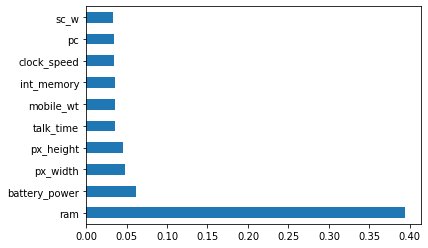

In [31]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**3.Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [36]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()                   # data contain all the dependent and independent variables
print(corrmat)
top_corr_features = corrmat.index

               battery_power      blue  ...      wifi  price_range
battery_power       1.000000  0.011252  ... -0.008343     0.200723
blue                0.011252  1.000000  ... -0.021863     0.020573
clock_speed         0.011482  0.021419  ... -0.024471    -0.006606
dual_sim           -0.041847  0.035198  ...  0.022740     0.017444
fc                  0.033334  0.003593  ...  0.020085     0.021998
four_g              0.015665  0.013443  ... -0.017620     0.014772
int_memory         -0.004004  0.041177  ...  0.006993     0.044435
m_dep               0.034085  0.004049  ... -0.028353     0.000853
mobile_wt           0.001844 -0.008605  ... -0.000409    -0.030302
n_cores            -0.029727  0.036161  ... -0.009964     0.004399
pc                  0.031441 -0.009952  ...  0.005389     0.033599
px_height           0.014901 -0.006872  ...  0.051824     0.148858
px_width           -0.008402 -0.041533  ...  0.030319     0.165818
ram                -0.000653  0.026351  ...  0.022669     0.91

In [37]:
print(top_corr_features)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


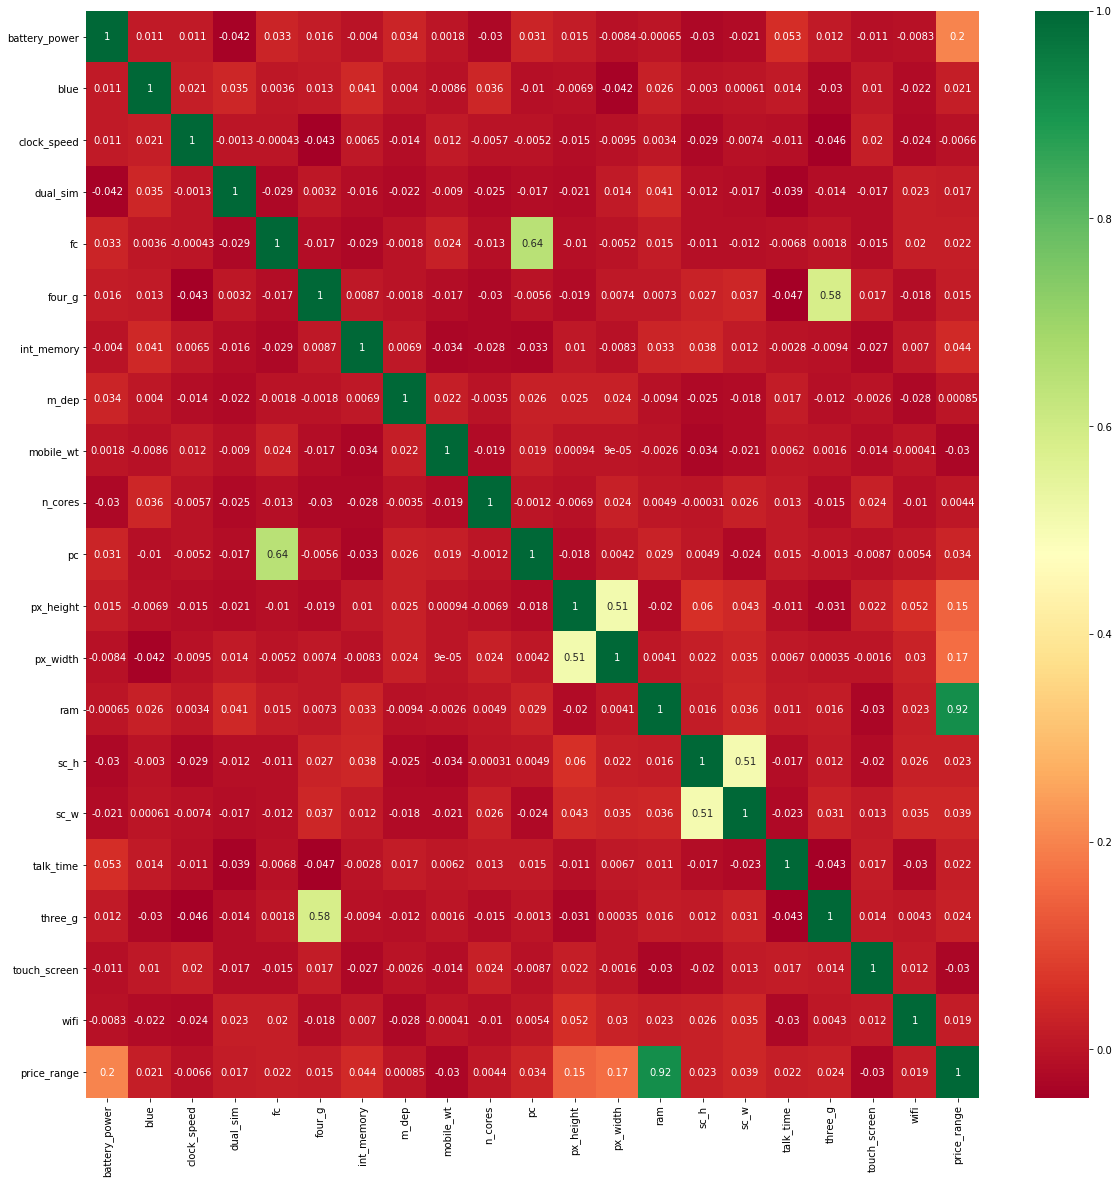

In [38]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

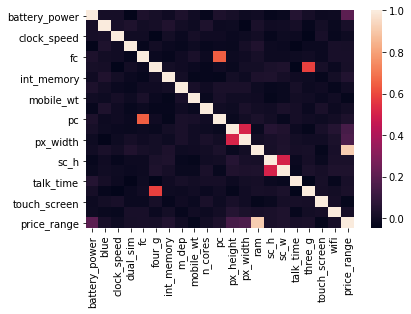

In [34]:
g=sns.heatmap(data[top_corr_features].corr())

Have a look at the last row i.e price range, see how the price range is correlated with other features, ram is the highly correlated with price range followed by battery power, pixel height and width while m_dep, clock_speed and n_cores seems to be least correlated with price_range.